In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
from plotly import express as px
import string
from wordcloud import WordCloud
import numpy as np 
import seaborn as sns
from text_cleaning import * 
import re

In [3]:
plt.style.use('seaborn')

In [4]:
raw_interact = pd.read_csv('data/RAW_interactions.csv')

In [105]:
# Remove Nan values in review 
raw_interact = raw_interact[~pd.isnull(raw_interact['review'])]

# Make sure review is of type str 
raw_interact.review = raw_interact.review.astype(str)
raw_interact.date = pd.DatetimeIndex(raw_interact['date'])

# Reviews exploration 

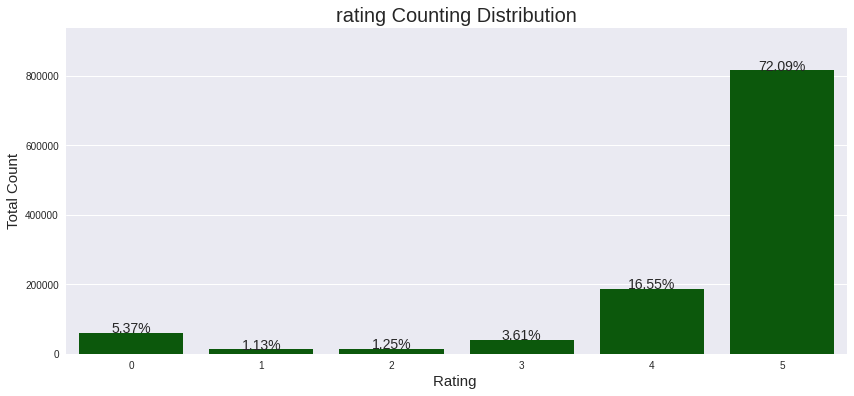

In [6]:
total = len(raw_interact)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating', color='darkgreen',
                  data=raw_interact)
g.set_title("rating Counting Distribution", fontsize=20)
g.set_xlabel("Rating ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

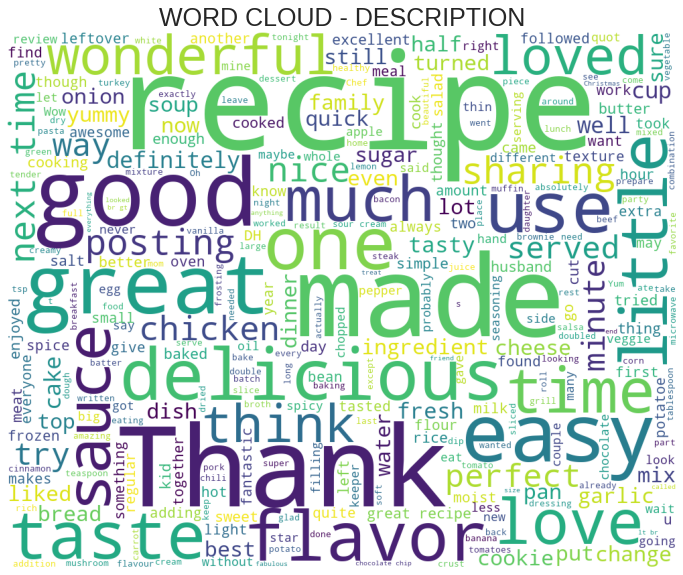

In [7]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['used', "added", "make", 'making',
                 'will', 'using', 'instead', 'bit', 'really', 
                 "add", "might"]

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(raw_interact['review'].sample(1500).astype(str)))

fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Text cleaning 

In [8]:
%time 
raw_interact['Clean_Reviews'] = raw_interact['review'].str.lower()
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_html_tags_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_url_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_accented_chars_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_punctuation_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_irr_char_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_extra_whitespaces_func)

/home/minhha/Study/ModIA5/AI_techno/projet_MODIA/text_cleaning.py:76: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()
/home/minhha/Study/ModIA5/AI_techno/projet_MODIA/text_cleaning.py:76: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


,user_id,recipe_id,date,rating,review,Clean_Reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,great with a salad cooked on top of stove for ...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",so simple so delicious great for chilly fall e...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,this worked very well and is easy i used not q...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,i made the mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",made the cheddar bacon topping adding a sprink...


In [10]:
raw_interact[['review', 'Clean_Reviews']].sample(10).head()

,review,Clean_Reviews
348191,We really enjoyed this sauce. I've not really ...,we really enjoyed this sauce i ve not really h...
534704,"The guys in my family agree, this is definentl...",the guys in my family agree this is definently...
661627,"Quick , easy and tasty. What more could you as...",quick easy and tasty what more could you as for
118502,A great & very simple mid-week recipe! Thanks ...,a great very simple mid week recipe thanks for...
339629,Nice recipe. I used sirloin instead of pork a...,nice recipe i used sirloin instead of pork and...


In [11]:
def word_count_func(text):
    '''
    Counts words within a string
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Number of words within a string, integer
    ''' 
    return len(text.split())

In [16]:
raw_interact['words_count'] = raw_interact['Clean_Reviews'].apply(word_count_func)

raw_interact[['review','Clean_Reviews', 'words_count']].sample(10).head()

,review,Clean_Reviews,words_count
265173,Used cod. 15 minutes is a little bit too long ...,used cod minutes is a little bit too long to c...,21
665318,"I tried this cake out of curiousity, just to s...",i tried this cake out of curiousity just to se...,89
601884,This was absolutely delicious! I will be makin...,this was absolutely delicious i will be making...,14
637658,this was a very good recipe.,this was a very good recipe,6
390838,"We just thought these needed BBQ sauce, maybe ...",we just thought these needed bbq sauce maybe b...,65


# Study of reviews of 0 ratings
<a id="2"></a> <br>

<div style="border-radius:10px; border:#DEB887 solid; padding: 2px; background-color: #FFFAF0; font-size:100%; text-align:left; color:black">

David B. : "Faites attention aux notes à 0 elles ne correspondent pas forcément à un sentiment négatif ou positif essayez d'en regarder quelques unes et décider de toutes les supprimer si elles posent problème."

In [17]:
rated_0 = raw_interact[raw_interact.rating==0].reset_index(drop=True)

<div style="border-radius:10px; border:#DEB887 solid; padding: 1px; background-color: #FFFAF0; font-size:100%; text-align:left; color:black">

🤔 Indeed, some recipes are unluckily noted 0 even when their reviews are really positive due to some questionable problems: 

* Users mis-clicked? 

In [27]:
rated_0[rated_0.user_id ==2130022][rated_0.recipe_id ==	277308]

/tmp/ipykernel_141691/2666357396.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rated_0[rated_0.user_id ==2130022][rated_0.recipe_id ==	277308]


,user_id,recipe_id,date,rating,review,Clean_Reviews,world_count,words_count
18078,2130022,277308,2014-01-08,0,This was easy and VERY YUMMY!! Easily 5 stars!,this was easy and very yummy easily stars,8,8


<div style="border-radius:10px; border:#DEB887 solid; padding: 1px; background-color: #FFFAF0; font-size:100%; text-align:left; color:black">

We decide to use a pre-trained model to filter only __truly NEGATIVE__ reviews.  

In [73]:
'''
LOADING PRETRAINED MODELS 
'''
from transformers import pipeline
# model_id = "Kaludi/Reviews-Sentiment-Analysis"
# model_id = "LiYuan/amazon-review-sentiment-analysis" for rating prediction 
model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_pipeline = pipeline("sentiment-analysis", model = model_id)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [74]:
%time 
n_rates = len(rated_0)
rated_0['sentiment'] = np.zeros(n_rates)
rated_0['score_sentiment'] = np.zeros(n_rates)
batch_size = 100
n_batches = int(n_rates/batch_size)
n_batches = 1 
for i in range(n_batches):
    print('BATCH: \n', i)
    
    start = i * batch_size
    end = min(start + batch_size, n_rates)

    # Extract the current batch.
    clean_reviews = list(rated_0.loc[start:end, 'Clean_Reviews'])

    sentiment = sentiment_pipeline(clean_reviews)
    
    rated_0.loc[start:end,'sentiment'] = [sent['label'] for sent in sentiment]
    rated_0.loc[start:end,'score_sentiment'] = [sent['score'] for sent in sentiment]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
BATCH: 
 0


In [82]:
rated_0[rated_0.sentiment == "negative"][rated_0.score_sentiment >= 0.8] 

,user_id,recipe_id,date,rating,review,Clean_Reviews,world_count,words_count,sentiment,score_sentiment
0,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo...",just an observation so i will not rate i follo...,105,105,negative,0.747011
10,44642,190875,2006-10-19,0,"Just posting, so I will know I tryed this. Nev...",just posting so i will know i tryed this never...,24,24,negative,0.521779
25,125636,90508,2009-07-31,0,These did not turn out very well for me..they ...,these did not turn out very well for me they w...,42,42,negative,0.404372
27,2000271443,264015,2015-06-15,0,"Oh, forgot to add, NO FLOUR in this recipe???",oh forgot to add no flour in this recipe,9,9,negative,0.552493
28,1802878096,56916,2014-07-02,0,"Not thrilled, my husband liked it but it was n...",not thrilled my husband liked it but it was no...,43,43,negative,0.583996
30,2477403,14813,2012-11-01,0,"Yick, yick, yick. No one in my family of five ...",yick yick yick no one in my family of five lik...,38,38,negative,0.905093
36,726381,232036,2008-01-13,0,nothing authentic here ..,nothing authentic here,3,3,negative,0.626412
51,95743,21132,2005-11-10,0,"Made this just as written, expecting to like i...",made this just as written expecting to like it...,27,27,negative,0.787004
52,215898,21132,2006-02-26,0,The flavor was good but we didn't care for the...,the flavor was good but we didn t care for the...,42,42,negative,0.841359
58,1840822,446948,2011-02-27,0,NOT an oreo lots of time to make and very disa...,not an oreo lots of time to make and very disa...,11,11,negative,0.923252


In [9]:
# wordcloud = WordCloud(
#     background_color='white',
#     stopwords=stopwords,
#     max_words=300,
#     max_font_size=200, 
#     width=1000, height=800,
#     random_state=42,
# ).generate(" ".join(sub_rated_0[sub_rated_0.sentiment == 'NEGATIVE'].review.astype(str)))

# Classify ratings to POSITIVE and NEGATIVE 

In [136]:
raw_interact['sentiment']  = 1* (raw_interact.rating.values > 3)
# raw_interact = raw_interact.replace({'sentiment': {1: 'positive', 0: 'negative'}})
df = raw_interact.copy()
df = df[df.rating != 0].reset_index(drop=True)

# Predict whether user like/dislike 

## Vectorization

In [138]:
interact_train = pd.read_csv('data/interactions_train.csv').drop(columns=['u', 'i'])
interact_train.rating = interact_train.rating.astype(int)
interact_train.date = pd.DatetimeIndex(interact_train['date'])

interact_test = pd.read_csv('data/interactions_test.csv').drop(columns=['u', 'i'])
interact_test.rating = interact_test.rating.astype(int)
interact_test.date = pd.DatetimeIndex(interact_test['date'])

train = interact_train.merge(raw_interact, how='inner', on=['user_id', 'recipe_id', 'date', 'rating'])
test  = interact_test.merge(raw_interact, how='inner', on=['user_id', 'recipe_id', 'date', 'rating'])

In [129]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
# Download stopwords list

stop_words = set(stopwords.words('english'))

# Interface lemma tokenizer from nltk with sklearn
class StemTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`', '&#039;']
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]

tokenizer=StemTokenizer()

[nltk_data] Downloading package punkt to /home/minhha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/minhha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
# Lemmatize the stop words
token_stop = tokenizer(' '.join(stop_words))

# Create TF-idf model
tfidf = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, max_features=4000)

#Construct the required TF-IDF matrix by fitting and transforming the data
vec_train = tfidf.fit_transform(train['Clean_Reviews'])
vec_test  = tfidf.transform(test['Clean_Reviews'])


# Build predictive model 

In [133]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [140]:
y = train.sentiment
y_test  = test.sentiment 

x_train, x_val, y_train, y_val = train_test_split(vec_train, y, test_size = 0.2)

In [142]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)
print ("Accuracy: %s" 
       % accuracy_score(y_val, rf.predict(x_val)))

Accuracy: 0.9378738016883674


# Explain predictive model with LIME 

In [145]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.5 MB/s eta 0:00:004.5 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=fee0ae75bfbffef64bfd88762c3d65af0bf55e7658d5a906a7f540ff988399fe
  Stored in directory: /home/minhha/.cache/pip/wheels/ef/f5/11/572c4d43760b43708e7ddb4b401a01742dcb4299a0aa385023
Successfully built lime


In [146]:
from lime import lime_text
from sklearn.pipeline import make_pipeline

c = make_pipeline(tfidf, rf)

In [147]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=[0,1])

In [151]:
idx = 12
exp = explainer.explain_instance(test.review[idx], c.predict_proba, num_features=8)
print('True class: %s' % y_test[idx])
exp.show_in_notebook(text=True)

True class: 1
